# 0002 - Polinomial Regression Model

# I. Abstract
This notebook is all about create a polynomial regression model.
- First part, setup a random equation y=a.x^2 + b.x + c and detach it's outputs
- Second part, setup model and trying to figure it own weight and bias.

# II. Setup data for training

In [36]:
import torch
import torch.nn as nn

In [37]:
class DefinedModel(nn.Module):
    def __init__(self):
        super().__init__();
        self.a = torch.tensor(-2.0, requires_grad=False)
        self.b = torch.tensor(1.5, requires_grad=False)
        self.c = torch.tensor(3.0, requires_grad=False)
        
    def forward(self,input):
        output = self.a * (input**2)  + (self.b * input) + self.c
        return output

In [38]:
x_input_list = torch.linspace(start=-10, end=10, steps=100)
definedModel = DefinedModel()
y_output_list = definedModel(x_input_list)

In [47]:
noise_list = torch.randint(low=-20, high=20, size=(len(x_input_list),))

In [48]:
y_output_noise_list = y_output_list + noise_list

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Polinomial Regression Dataset')

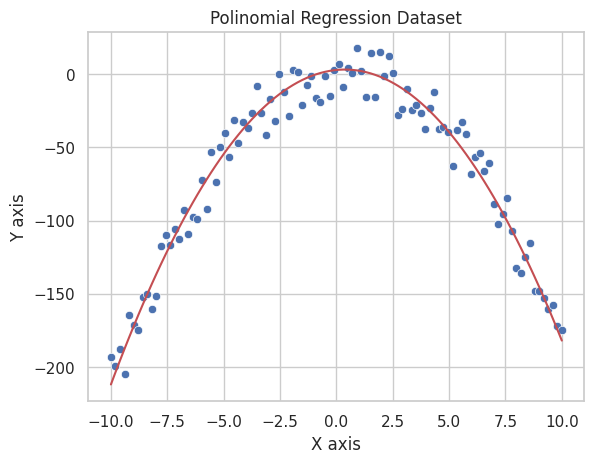

In [50]:
sns.set(style='whitegrid')
sns.lineplot(x=x_input_list, y= y_output_list, color='r')
sns.scatterplot(x=x_input_list, y=y_output_noise_list)
plt.ylabel("Y axis")
plt.xlabel("X axis")
plt.title("Polinomial Regression Dataset")

# III. Setup an empty model for training

In [52]:
class TrainModel(nn.Module):
    def __init__(self):
        super().__init__();
        self.a = nn.Parameter(torch.tensor(2.0, requires_grad=True))
        self.b = nn.Parameter(torch.tensor(3.5, requires_grad=True))
        self.c = nn.Parameter(torch.tensor(4.0, requires_grad=True))
        
    def forward(self,input):
        output = self.a * (input**2)  + (self.b * input) + self.c
        return output

In [62]:
train_model = TrainModel()

In [63]:
train_model_y_output = train_model(x_input_list)

Text(0.5, 1.0, 'Polinomial Regression Dataset')

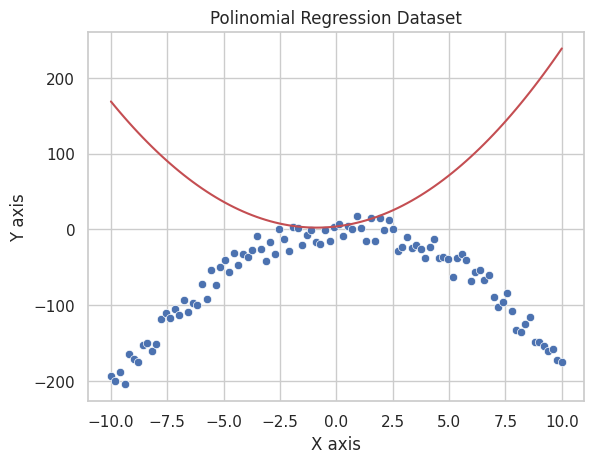

In [64]:
sns.set(style='whitegrid')
sns.lineplot(x=x_input_list, y=train_model_y_output.detach(), color='r')
sns.scatterplot(x=x_input_list, y=y_output_noise_list)
plt.ylabel("Y axis")
plt.xlabel("X axis")
plt.title("Polinomial Regression Dataset")

In [65]:
global_current_epoch = 0
best_avg_total_loss = float('inf')

In [66]:
number_of_epoch = 1000

In [67]:
optimizer = torch.optim.Adam(params=train_model.parameters(), lr=0.001)

In [73]:
def add_prefix_zero(number, zero_count):
    return "{0:0{1}d}".format(number, zero_count)

In [74]:
def draw_plot(model, epoch="Unknown"):
    plt.clf()
    sns.set(style='whitegrid')
    sns.lineplot(x=x_input_list, y= model(x_input_list).detach(), color='r')
    sns.scatterplot(x=x_input_list, y=y_output_noise_list)
    plt.ylabel("Y axis")
    plt.xlabel("X axis")
    plt.title(f"Epoch {epoch}")

In [75]:
def save_plot(model, epoch):
    plt.clf()
    sns.set(style='whitegrid')
    sns.lineplot(x=x_input_list, y= model(x_input_list).detach(), color='r')
    sns.scatterplot(x=x_input_list, y=y_output_noise_list)
    plt.ylabel("Y axis")
    plt.xlabel("X axis")
    plt.title(f"Epoch {epoch}")
    file_name = f"model_{add_prefix_zero(epoch, 4)}.png"
    plt.savefig(f"../images/0002/{file_name}")

In [ ]:
for epoch in range(number_of_epoch):
    avg_total_loss = 0.0
    total_loss = 0.0
    for i in range(len(x_input_list)):
        input = x_input_list[i]
        real_output = y_output_list[i]
        
        model_output = train_model(input)
        loss = (model_output - real_output) ** 2
        loss.backward()
        total_loss = total_loss + float(loss)
    
    avg_total_loss = total_loss / len(x_input_list)
    
    print(f"\rAfter Epoch {global_current_epoch}, avg_total_loss: {avg_total_loss}", end="")
    
    if avg_total_loss < best_avg_total_loss:
        best_avg_total_loss = avg_total_loss
        optimizer.step()
        optimizer.zero_grad()
        save_plot(train_model, global_current_epoch)
        global_current_epoch = global_current_epoch + 1
    else:
        print("")
        print(f"After Epoch {global_current_epoch}, avg_total_loss: {avg_total_loss} greater than the best_avg_total_loss {best_avg_total_loss}.")
        print(f"After Epoch {global_current_epoch}, Linear Regression: y={train_model.weight.data}.x + {train_model.bias.data}")
        print("Stop Training.")
        break;

After Epoch 1931, avg_total_loss: 10686.101333499135

In [ ]:
def draw_plot(model, epoch=global_current_epoch):